# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

# Imports

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step 1: Read in Data

In [2]:
df = pd.read_csv('kc_house_data_train_3.csv', index_col = 0)

# Feature Selection

In [3]:
df.head(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,yr_sold,house_views,dist_frm_space_needle,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,...,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_1,mnth_sold_Aug,mnth_sold_Dec,mnth_sold_Feb,mnth_sold_Jan,mnth_sold_Jul,mnth_sold_Jun,mnth_sold_Mar,mnth_sold_May,mnth_sold_Nov,mnth_sold_Oct,mnth_sold_Sep,no_bld_code_std,custom_bld_desgin,grade_6,grade_7,grade_8,grade_9,grade_10,has_basement,has_renovation,bedroom_squared,bathroom_squared
0,2591820310,365000.0,4.0,2.25,2070,8893,2.0,0,4,8,2070,0,1986,0,47.4388,-122.162,2390,7700,2014,not viewed,16.818363,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,16.0,5.0625
1,7974200820,865000.0,5.0,3.00,2900,6730,1.0,0,5,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,2014,not viewed,3.594179,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,25.0,9.0000
2,7701450110,1038000.0,4.0,2.50,3770,10893,2.0,2,3,11,3770,0,1997,0,47.5646,-122.129,3710,9685,2014,2_views,11.674837,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,16.0,6.2500


In [4]:
leave = ['price', 'id', 'bedrooms', 'bathrooms', 'yr_built', 'floors', 'house_views', 'grade', 'sqft_basement', 'lat', 'long',  'condition', 'yr_sold','yr_renovated', 'sqft_lot15', 'mnth_sold', 'id']
features = [x for x in df.columns if x not in leave]
print(leave)
print(features)

['price', 'id', 'bedrooms', 'bathrooms', 'yr_built', 'floors', 'house_views', 'grade', 'sqft_basement', 'lat', 'long', 'condition', 'yr_sold', 'yr_renovated', 'sqft_lot15', 'mnth_sold', 'id']
['sqft_living', 'sqft_lot', 'view', 'sqft_above', 'sqft_living15', 'dist_frm_space_needle', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'z

In [5]:
df[features]

,sqft_living,sqft_lot,view,sqft_above,sqft_living15,dist_frm_space_needle,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_1,mnth_sold_Aug,mnth_sold_Dec,mnth_sold_Feb,mnth_sold_Jan,mnth_sold_Jul,mnth_sold_Jun,mnth_sold_Mar,mnth_sold_May,mnth_sold_Nov,mnth_sold_Oct,mnth_sold_Sep,no_bld_code_std,custom_bld_desgin,grade_6,grade_7,grade_8,grade_9,grade_10,has_basement,has_renovation,bedroom_squared,bathroom_squared
0,2070,8893,0,2070,2390,16.818363,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,16.0,5.0625
1,2900,6730,0,1830,2370,3.594179,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,25.0,9.0000
2,3770,10893,2,3770,3710,11.674837,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,16.0,6.2500
3,4560,14608,2,4560,4050,6.605938,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,9.0,12.2500
4,2550,5376,0,2550,2250,12.355725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,9.0,6.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,3240,9960,1,2020,2730,11.761164,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,25.0,6.2500
17286,1300,4000,0,1300,1350,3.119168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,4.0,3.0625
17287,1050,9876,0,1050,1760,8.933998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,9.0,1.0000
17288,1900,43186,0,1300,2080,22.920362,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,9.0,2.2500


In [6]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[features].values, i) for i in range(df[features].shape[1])]
vif["features"] = df[features].columns
vif.round(1)

,VIF Factor,features
0,16.7,sqft_living
1,1.2,sqft_lot
2,1.5,view
3,15.8,sqft_above
4,3.3,sqft_living15
5,32.0,dist_frm_space_needle
6,1.6,zipcode_98002
7,1.8,zipcode_98003
8,3.9,zipcode_98004
9,2.4,zipcode_98005


### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [7]:
poly2 = PolynomialFeatures(degree=2, include_bias=False)

In [8]:
poly2_data = poly2.fit_transform(df[features])


poly2_columns = poly2.get_feature_names(features)

df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)

df_poly2.head()

,sqft_living,sqft_lot,view,sqft_above,sqft_living15,dist_frm_space_needle,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,...,custom_bld_desgin grade_10,custom_bld_desgin has_basement,custom_bld_desgin has_renovation,custom_bld_desgin bedroom_squared,custom_bld_desgin bathroom_squared,grade_6^2,grade_6 grade_7,grade_6 grade_8,grade_6 grade_9,grade_6 grade_10,grade_6 has_basement,grade_6 has_renovation,grade_6 bedroom_squared,grade_6 bathroom_squared,grade_7^2,grade_7 grade_8,grade_7 grade_9,grade_7 grade_10,grade_7 has_basement,grade_7 has_renovation,grade_7 bedroom_squared,grade_7 bathroom_squared,grade_8^2,grade_8 grade_9,grade_8 grade_10,grade_8 has_basement,grade_8 has_renovation,grade_8 bedroom_squared,grade_8 bathroom_squared,grade_9^2,grade_9 grade_10,grade_9 has_basement,grade_9 has_renovation,grade_9 bedroom_squared,grade_9 bathroom_squared,grade_10^2,grade_10 has_basement,grade_10 has_renovation,grade_10 bedroom_squared,grade_10 bathroom_squared,has_basement^2,has_basement has_renovation,has_basement bedroom_squared,has_basement bathroom_squared,has_renovation^2,has_renovation bedroom_squared,has_renovation bathroom_squared,bedroom_squared^2,bedroom_squared bathroom_squared,bathroom_squared^2
0,2070.0,8893.0,0.0,2070.0,2390.0,16.818363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.0,5.0625,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256.0,81.00,25.628906
1,2900.0,6730.0,0.0,1830.0,2370.0,3.594179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,25.0,9.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,25.0,9.0,0.0,0.0,0.0,625.0,225.00,81.000000
2,3770.0,10893.0,2.0,3770.0,3710.0,11.674837,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,16.0,6.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256.0,100.00,39.062500
3,4560.0,14608.0,2.0,4560.0,4050.0,6.605938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,12.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,110.25,150.062500
4,2550.0,5376.0,0.0,2550.0,2250.0,12.355725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,1.0,0.0,0.0,0.0,9.0,6.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,56.25,39.062500


## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

In [9]:
#call train_test_split on the data and capture the results
X_poly2_train, X_poly2_test, y_train, y_test = train_test_split(df_poly2, df['price'], random_state=25,test_size=0.2)

In [10]:
#check the shape of the results
print("Training set - Features: ", X_poly2_train.shape, "Target: ", y_train.shape)
print("Testing set - Features: ", X_poly2_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 4949) Target:  (13832,)
Testing set - Features:  (3458, 4949) Target:  (3458,)


### 5.2) Fit your scaler to training the data.

In [11]:
# from sklearn.preprocessing import StandardScaler

poly2_scaler = StandardScaler()


#fit and transform the training data
Xs_poly2_train = pd.DataFrame(data=poly2_scaler.fit_transform(X_poly2_train), columns=df_poly2.columns)


### 5.3) Transform the testing set with the scaler.

In [12]:
#transform the testing dat
Xs_poly2_test = pd.DataFrame(data=poly2_scaler.transform(X_poly2_test), columns=df_poly2.columns)

### 5.4) Fit the model to the training data.

In [13]:
# instantiate a linear regression object
lm_poly2 = LinearRegression()

#fit the linear regression to the data
lm_poly2 = lm_poly2.fit(X_poly2_train, y_train)

y_train_pred = lm_poly2.predict(X_poly2_train)

poly2_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Polynomial Training Root Mean Squared Error:' , poly2_train_rmse)

Polynomial Training Root Mean Squared Error: 90187.32220845524


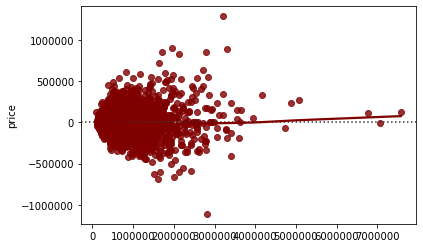

In [14]:
sns.residplot(y_train_pred, y_train, lowess=True, color="maroon")

### 5.5) Use the model to predict on the training set and the test set.

In [15]:
y_train_pred = lm_poly2.predict(X_poly2_train)
y_test_pred = lm_poly2.predict(X_poly2_test)

poly2_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
poly2_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

### 5.6) Evaluate the training and test predictions using RMSE.

In [16]:
print('Polynomial Training Root Mean Squared Error:' , poly2_train_rmse)
print('Polynomial Testing Root Mean Squared Error:' , poly2_test_rmse)

Polynomial Training Root Mean Squared Error: 90187.32220845524
Polynomial Testing Root Mean Squared Error: 131162.42024751563


### 5.7) Determine if your model is overfit.

In [17]:
print('Training: ', int(poly2_train_rmse), "vs. Testing: ", int(poly2_test_rmse))

Training:  90187 vs. Testing:  131162


## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

# KBest

In [18]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=200) # select the 200 best features using their f-statistic

selector.fit(X_poly2_train, y_train)

C:\Users\akams\anaconda3\envs\learn-env\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=200, score_func=<function f_regression at 0x000002376121F1E0>)

In [19]:
selected_poly2_columns = X_poly2_train.columns[selector.get_support()] # shows me all the columns htat are kept
removed_poly2_columns = X_poly2_train.columns[~selector.get_support()] # shows me all the columns htat are not kept
Xsc_poly2_train = X_poly2_train[selected_poly2_columns]
Xsc_poly2_test = X_poly2_test[selected_poly2_columns]

In [20]:
#instantiate a linear regression object
lm_poly2_kbest = LinearRegression()

#fit the linear regression to the data
lm_poly2_kbest.fit(Xsc_poly2_train, y_train)

y_train_kbest = lm_poly2_kbest.predict(Xsc_poly2_train)


p2_trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , p2_trainK_rmse)

y_kbest = lm_poly2_kbest.predict(Xsc_poly2_test)

p2_testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , p2_testK_rmse)




Training Root Mean Squared Error: 131844.8882556485
Testing Root Mean Squared Error: 140287.29433615893


### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [21]:
from sklearn.feature_selection import RFECV

ols = LinearRegression()

# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=7, scoring='neg_mean_squared_error', n_jobs=10, verbose=0)

# Fit recursive feature eliminator 
selector.fit(Xsc_poly2_train, y_train)

RFECV(cv=7,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=10, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [22]:
selected_poly2_rfe = Xsc_poly2_train.columns[selector.support_]
removed_poly2_rfe = Xsc_poly2_train.columns[~selector.support_]

In [23]:
list(removed_poly2_rfe)

len(list(selected_poly2_rfe))

200

## Step 7: Evaluate your different models in order to determine the best model overall.

In [24]:
#instantiate a linear regression object
lm_poly2_rfe = LinearRegression()

#fit the linear regression to the data
lm_poly2_rfe = lm_poly2_rfe.fit(X_poly2_train[selected_poly2_rfe], y_train)

y_rfe = lm_poly2_rfe.predict(X_poly2_train[selected_poly2_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_poly2_rfe.predict(X_poly2_test[selected_poly2_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)




Training Root Mean Squared Error: 131844.8882556485
Testing Root Mean Squared Error: 140287.29433615893


## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/